YOUR NAME HERE: Daniel DeLuca

# Homework 5: Bar Graphs & Group By

Covers material from Ch 6/7 in the text

* ### All visuals must have axes labels and a title, whether the directions state it or not.  

* ### Also, Labels should reflect the units where needed as well.

* ### Make sure that the text on the axes labels are present, grammatically correct, capitalized accurately, and make sense.

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


---
## A. Causes of Death in California


We'll be looking at a dataset from the California Department of Public Health (available [here](http://www.healthdata.gov/dataset/leading-causes-death-zip-code-1999-2013) and described [here](http://www.cdph.ca.gov/data/statistics/Pages/DeathProfilesbyZIPCode.aspx)) that records the cause of death (as recorded on a death certificate) for everyone who died in California from 1999 to 2013.  

First, let's look at what causes of death are actually tracked.  Each has an abbreviation.  Import the file `abbreviations.csv` to see.

In [111]:
abbreviations = pd.read_csv("abbreviations.csv")
abbreviations

,Cause of Death,Cause of Death (Full Description)
0,AID,Acquired Immune Deficiency Syndrome (AIDS)
1,ALZ,Alzheimer's Disease
2,CAN,Malignant Neoplasms (Cancers)
3,CLD,Chronic Lower Respiratory Disease (CLRD)
4,CPD,Chronic Obstructive Pulmonary Disease (COPD)
5,DIA,Diabetes Mellitus
6,HIV,Human Immunodeficiency Virus Disease (HIVD)
7,HOM,Homicide
8,HTD,Diseases of the Heart
9,HYP,Essential Hypertension and Hypertensive Renal ...


Now let's look at the Public Health data set for everyone who died in California from 1999 to 2013.  The data are in the file `causes_of_death.csv`.  Each row records the number of deaths by one cause in one year in one ZIP code.

In [112]:
causes = pd.read_csv('causes_of_death.csv')
causes.head(20)


,Year,ZIP Code,Cause of Death,Count,Location
0,1999,90002,SUI,1,"(33.94969, -118.246213)"
1,1999,90005,HOM,1,"(34.058508, -118.301197)"
2,1999,90006,ALZ,1,"(34.049323, -118.291687)"
3,1999,90007,ALZ,1,"(34.029442, -118.287095)"
4,1999,90009,DIA,1,"(33.9452, -118.3832)"
5,1999,90009,LIV,1,"(33.9452, -118.3832)"
6,1999,90009,OTH,1,"(33.9452, -118.3832)"
7,1999,90010,STK,1,"(34.060633, -118.302664)"
8,1999,90010,CLD,1,"(34.060633, -118.302664)"
9,1999,90010,DIA,1,"(34.060633, -118.302664)"


### Question 1

Sensibly, there are a lot of rows in the table.  Find the number of rows in the table.

In [113]:
len(causes)

320152

---

### Question 2

Find the number of zip codes contained in the data.

In [114]:
zippy = causes['ZIP Code'].unique()
len(zippy)

1785

---

###  Question 3 

Find the top 5 causes of death in California over the entire period covered by the data.  To do that, create a table with one row for each of the top 5 causes of death, a column called "Cause of Death", and a column called "Count" that records the total number of deaths due to that cause.  

Your table should: 

* Be called `top_5_causes`.

* Be sorted in descending order by count.


* Have at most 2 columns, no more.

* Be a dataframe and not a series (so it should look pretty with rows alternating white/grey instead of just text)

In [115]:
causes["Cause of Death"].unique()

array(['SUI', 'HOM', 'ALZ', 'DIA', 'LIV', 'OTH', 'STK', 'CLD', 'PNF',
       'INJ', 'HTD', 'CAN', 'HYP', 'NEP'], dtype=object)

In [116]:
# Use this cell to find the top 5 causes of death.
# Enter more cells if needed
causess = causes[["Cause of Death","Count"]]
causess = causess.groupby(["Cause of Death"]).sum().reset_index()
causess.sort_values("Count",ascending = False).iloc[0:5]

,Cause of Death,Count
5,HTD,957108
1,CAN,822906
10,OTH,637764
12,STK,231897
2,CLD,194961


### Question 4 

Create a horizontal bar chart that displays the *proportion of all deaths* by each cause.  

NOTES:

* There should be a bar for each possible category, so you're not using the dataframe from the previous question.
* The bars should be ordered, longest at the top to shortest at the bottom.


In [117]:
n = len(bars)
multipliers = np.ones(n)*100/n  #Divide each of our 1's by n and multiply by 100 so we can look at this on a 0-100 percent scale.
multipliers

array([7.14285714, 7.14285714, 7.14285714, 7.14285714, 7.14285714,
       7.14285714, 7.14285714, 7.14285714, 7.14285714, 7.14285714,
       7.14285714, 7.14285714, 7.14285714, 7.14285714])

In [118]:
bars = causess.groupby(["Cause of Death"]).sum().reset_index()
bars = bars.sort_values("Count",ascending = True)

Text(0, 0.5, 'Cause of Death')

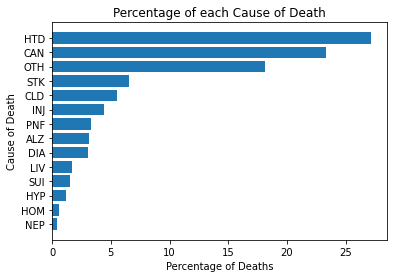

In [119]:
plt.barh(bars['Cause of Death'], bars['Count'] / bars["Count"].sum()*100)
plt.xlabel('Percentage of Deaths')
plt.title('Percentage of each Cause of Death')
plt.ylabel('Cause of Death')

### Question 5

A) Create a line graph of the total number of deaths per year in California.

* Make the y axis range from 0 to 300000

In [120]:
cont = causes.groupby("Year").sum()
cont

,ZIP Code,Count
Year,,
1999,1983222094,227965
2000,1988282828,228281
2001,1993311376,232790
2002,2012136000,233246
2003,2001932156,239325
2004,1983377816,232464
2005,2001713294,236196
2006,2001465424,236452
2007,2005595998,233467


Text(0, 0.5, 'Deaths')

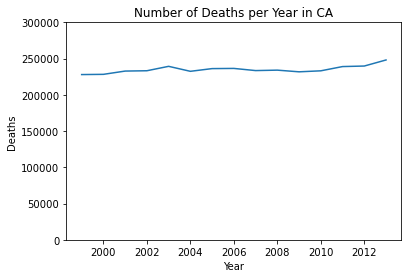

In [121]:
plt.plot(cont.index, cont['Count'])
plt.ylim(0,300000)
plt.title('Number of Deaths per Year in CA')
plt.xlabel('Year')
plt.ylabel('Deaths')

B) Use the **loops with stars** to loop over each group you created to make the plot above, so as to check the validity of your groups prior to aggregating.

In [122]:
conts = causes.groupby("Year")

In [123]:
for key, group in conts:
    print(key)
    print(group)
    print('************************************')

1999
        Year  ZIP Code Cause of Death  Count                 Location 
0       1999     90002            SUI      1   (33.94969, -118.246213)
1       1999     90005            HOM      1  (34.058508, -118.301197)
2       1999     90006            ALZ      1  (34.049323, -118.291687)
3       1999     90007            ALZ      1  (34.029442, -118.287095)
4       1999     90009            DIA      1      (33.9452, -118.3832)
...      ...       ...            ...    ...                       ...
239075  1999     96161            HYP      0  (39.338546, -120.172942)
239076  1999     96161            HOM      0  (39.338546, -120.172942)
239077  1999     96161            NEP      0  (39.338546, -120.172942)
239078  1999     99999            HYP      0                       NaN
239079  1999     99999            NEP      0                       NaN

[21210 rows x 5 columns]
************************************
2000
        Year  ZIP Code Cause of Death  Count                 Location 
2279

C) You should see that deaths have increased a little over time, though not uniformly.  How would you explain that?  Describe a dataset you'd like to see to test whether your explanation is valid.

This is explained by the increased population size in California. A datset I would like to see to test this a crime in California Dataset

D) Create a line graph of the total number of deaths for each of the top 5 categories per year in California.

* Be sure to include a legend.

* HINT:  To get started use ``isin`` to get just the rows with the top 5 categories.

E)  Which cause seems to have a decreasing rate versus an increasing rate?  Do not use the abbreviation.  Look up the cause of death.

*Your answer here*

---
## B. Consumer Financial Protection Bureau Complaints


The Consumer Financial Protection Bureau has collected and published consumer complaints against financial companies since 2011.  The data was retrieved from  [here](https://dev.socrata.com/foundry/data.consumerfinance.gov/jhzv-w97w) .  For this exercise, to make your code run faster, we've selected only the data from May 2016.

Run the next cell to load the data.  Each row represents one consumer's complaint.

In [124]:
# Just run this cell.
complaints = pd.read_csv("complaints.csv")
complaints

,company,company_public_response,company_response,complaint_id,complaint_what_happened,consumer_consent_provided,consumer_disputed,date_received,date_sent_to_company,issue,product,state,sub_issue,sub_product,submitted_via,tags,timely,zip_code
0,"TransUnion Intermediate Holdings, Inc.",Company has responded to the consumer and the ...,Closed with explanation,1920073,(None),(None),Yes,2016-05-11T15:39:07.000,2016-05-11T15:39:07.000,Credit reporting company's investigation,Credit reporting,VT,Inadequate help over the phone,(None),Phone,(None),Yes,05035
1,"TransUnion Intermediate Holdings, Inc.",Company has responded to the consumer and the ...,Closed with explanation,1914777,(None),Consent not provided,No,2016-05-08T00:53:47.000,2016-05-12T18:40:34.000,Incorrect information on credit report,Credit reporting,MO,Information is not mine,(None),Web,(None),Yes,63020
2,Bank of America,Company has responded to the consumer and the ...,Closed with explanation,1907306,I became aware of several charges on a Bank of...,Consent provided,No,2016-05-03T16:49:33.000,2016-05-03T16:49:34.000,Other,Credit card,VA,(None),(None),Web,(None),Yes,239XX
3,Finance of America Reverse LLC,Company believes it acted appropriately as aut...,Closed with explanation,1919055,I applied for a reverse mortgage and everthing...,Consent provided,No,2016-05-10T20:13:22.000,2016-05-10T20:13:23.000,"Application, originator, mortgage broker",Mortgage,TX,(None),Reverse mortgage,Web,Older American,Yes,774XX
4,"Acceptance Solutions Group, INC",Company believes it acted appropriately as aut...,Closed with explanation,1908628,Keeps calling numbers that are not mine. And t...,Consent provided,No,2016-05-03T21:05:42.000,2016-05-06T13:42:45.000,Improper contact or sharing of info,Debt collection,OH,Talked to a third party about my debt,Payday loan,Web,(None),Yes,430XX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15026,JPMorgan Chase & Co.,(None),Closed with explanation,1929999,(None),Consent not provided,(None),2016-05-17T20:16:45.000,2016-05-17T20:16:45.000,Other,Credit card,MI,(None),(None),Web,(None),Yes,48103
15027,Equifax,(None),Closed with explanation,1921320,(None),(None),No,2016-05-11T18:16:31.000,2016-05-13T19:51:48.000,Incorrect information on credit report,Credit reporting,AR,Personal information,(None),Phone,(None),Yes,71901
15028,Capital One,(None),Closed with explanation,1929240,On Sunday XXXX XXXX 2016 about XXXX XXXX I cal...,Consent provided,(None),2016-05-17T15:13:00.000,2016-05-17T15:13:00.000,Deposits and withdrawals,Bank account or service,MD,(None),Checking account,Web,(None),Yes,207XX
15029,Experian,Company has responded to the consumer and the ...,Closed with non-monetary relief,1917830,(None),(None),No,2016-05-10T15:13:30.000,2016-05-10T18:01:48.000,Incorrect information on credit report,Credit reporting,NH,Account status,(None),Postal mail,(None),Yes,03062


---

###  Question 6  

Financial companies offer a variety of products.  How many complaints were made against each kind of product?  Make a table called `complaints_per_product` with one row per product category and 2 columns: "product" (the name of the product) and "number of complaints" (the number of complaints made against that kind of product).

In [125]:
compliants_per_companye = pd.DataFrame(complaints.groupby("company").count())
compliants_per_companyq = compliants_per_companye.reset_index()
compliants_per_companyw = compliants_per_companyq[["company","issue"]]
compliants_per_company = compliants_per_companyw.rename(columns = {"issue" : "number of compliants"})
compliants_per_company


,company,number of compliants
0,1st Preference Mortgage,2
1,21st Mortgage Corporation,7
2,2288984 Ontario Inc.,3
3,360 Mortgage,1
4,"3rd Generation, Inc.",1
...,...,...
1136,"Zenith Financial Mortgage Company, Inc.",1
1137,Zenith Financial Network Inc,1
1138,Zions Bancorporation,8
1139,Zwicker & Associates,6


In [126]:

group = complaints.groupby('product').count()
groups = group.reset_index()
groupsa = groups[["product" , "issue"]]
compliants_per_product = groupsa.rename(columns = {"issue" : "number of compliants"})
compliants_per_product

,product,number of compliants
0,Bank account or service,1687
1,Consumer Loan,775
2,Credit card,1566
3,Credit reporting,3820
4,Debt collection,3022
5,Money transfers,142
6,Mortgage,3468
7,Other financial service,16
8,Payday loan,119
9,Prepaid card,110


---

###  Question 7  

Make a bar chart showing how many complaints were made about each product category.

Text(0.5, 1.0, 'Number of Compliants in each Product Category')

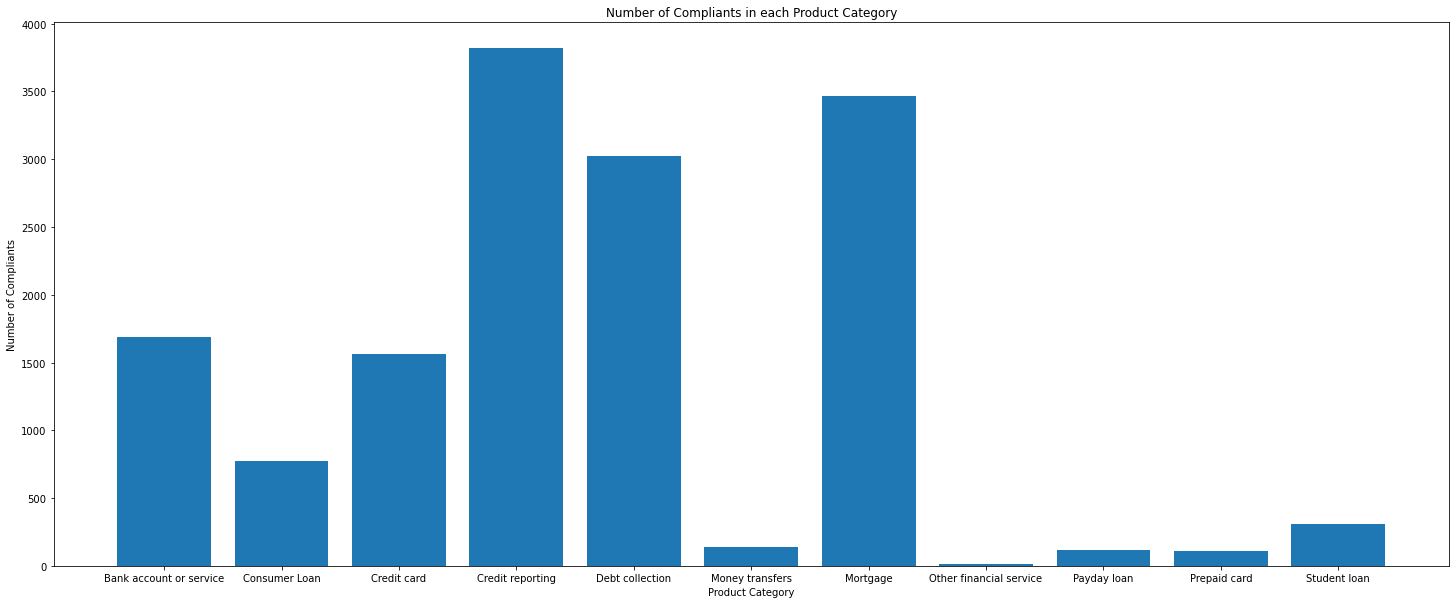

In [127]:
plt.figure(figsize =(25,10))
plt.bar(group.index , group["company"])
plt.xlabel('Product Category')
plt.ylabel('Number of Compliants')
plt.title('Number of Compliants in each Product Category')

---

###  Question 8  

Make a table of the number of complaints made against each *company*.  Call it `complaints_per_company`.  It should have one row per company and 2 columns: "company" (the name of the company) and "number of complaints" (the number of complaints made against that company).

In [128]:
compliants_per_companye = pd.DataFrame(complaints.groupby("company").count())
compliants_per_companyq = compliants_per_companye.reset_index()
compliants_per_companyw = compliants_per_companyq[["company","issue"]]
compliants_per_company = compliants_per_companyw.rename(columns = {"issue" : "number of compliants"})
compliants_per_company

,company,number of compliants
0,1st Preference Mortgage,2
1,21st Mortgage Corporation,7
2,2288984 Ontario Inc.,3
3,360 Mortgage,1
4,"3rd Generation, Inc.",1
...,...,...
1136,"Zenith Financial Mortgage Company, Inc.",1
1137,Zenith Financial Network Inc,1
1138,Zions Bancorporation,8
1139,Zwicker & Associates,6


---

### Question 9

It wouldn't be a good idea to make a bar chart of that data.  (Don't try it!)  Why not?

It would not be a good idea because of the over 1100 companies. It could not fit neatly on a bar chart

There are way too many rows/companies for a bar chart!

---

### Question 10 


Make a bar chart of just the companies with the most complaints.  Specifically, make a chart that displays the number of complaints against the companies with the 10 most complaints.

In [157]:
compliants_per_company_10 = compliants_per_company.sort_values("number of compliants" , ascending = False)
compliants_per_company_10 = compliants_per_company_10.head(10)
compliants_per_company_10

,company,number of compliants
373,Equifax,1440
383,Experian,1240
1049,"TransUnion Intermediate Holdings, Inc.",1034
1114,Wells Fargo & Company,771
133,Bank of America,769
557,JPMorgan Chase & Co.,730
215,Citibank,717
741,Ocwen,344
195,Capital One,315
715,Nationstar Mortgage,269


Text(0.5, 1.0, 'Top 10 Companies with the Most Complaints')

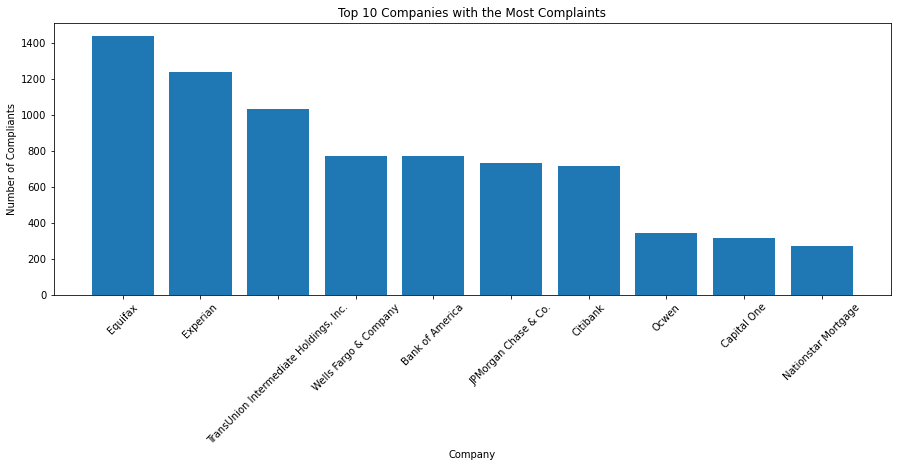

In [163]:
plt.figure(figsize = (15,5))
plt.bar(compliants_per_company_10["company"] , compliants_per_company_10["number of compliants"])
plt.xticks(rotation = 45)
plt.xlabel("Company")
plt.ylabel("Number of Compliants")
plt.title("Top 10 Companies with the Most Complaints")

---

### Question 11 

Make a bar chart like the one above, with one difference: The size of each company's bar should be the *proportion* (among *all complaints* made against any company in `complaints`) that were made against that company.

Text(0.5, 1.0, 'Top 10 Companies with the Most Complaints')

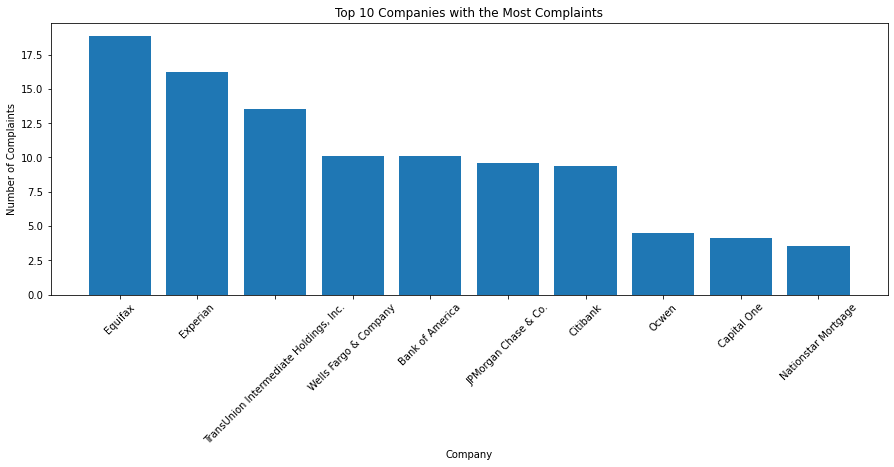

In [167]:
plt.figure(figsize = (15,5))
plt.bar(compliants_per_company_10["company"] , compliants_per_company_10["number of compliants"]/7629 *100)
plt.xticks(rotation = 45)
plt.xlabel("Company")
plt.ylabel("Number of Complaints")
plt.title("Top 10 Companies with the Most Complaints")

In [165]:
compliants_per_company_10.sum()[1]


7629

---
## C. Car Types

This data set contains info on the 2019 models of widely sold cars. Each row has this data. 

* Make_Model
*  Sadan
* SUV
* Hatchback
* Convertible
* Wagon
* Coupe
* Minivan
* Drive Wheels (Available)
* Seating
* Engine (liter)
* HP (Horse Power)
* Length (in)
* Width (in)
* Height (in)
* Wheelbase (in)
* Weight (lbs)
* Cargo Volume (cu ft.)
* Overall MPG (Miles Per Gallon)
* Lowest MSRP (MSRP stands for Manufacture Suggested Retail Price)
* Parent Company HQ


In [132]:
cars = pd.read_csv("cars.csv")
cars

,Make_Model,Sadan,SUV,Hatchback,Convertible,Wagon,Coupe,Minivan,Drive Wheels (Available),Seating,...,HP,Length (in),Width (in),Height (in),Wheelbase (in),Weight (lbs),Cargo Volume (cu ft.),Overall MPG,Lowest MSRP,Parent Company HQ
0,Acura ILX,Yes,No,No,No,No,No,No,Front,5,...,201,182,71,56,105,3095,12.0,28.0,30000,Japan
1,Acura MDX,No,Yes,No,No,No,No,No,"Front, AWD",7,...,321,196,77,67,111,4200,34.0,21.0,44300,Japan
2,Acura RDX,No,Yes,No,No,No,No,No,"Front, AWD",5,...,272,187,74,66,108,4005,33.0,22.0,37600,Japan
3,Acura RLX,Yes,No,No,No,No,No,No,"Front, AWD",5,...,310,198,74,58,112,3930,15.0,23.0,54900,Japan
4,Acura TLX,Yes,No,No,No,No,No,No,"Front, AWD",5,...,206,190,74,57,109,3480,13.0,26.0,33000,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Volvo S60,Yes,No,No,No,No,No,No,"Front, AWD",5,...,250,187,80,57,113,3740,12.0,26.0,35800,China
218,Volvo S90,Yes,No,No,No,No,No,No,"Front, AWD",5,...,250,195,74,57,116,4085,14.0,23.0,47350,China
219,Volvo XC40,No,Yes,No,No,No,No,No,"Front, AWD",5,...,187,174,73,65,106,3785,25.5,24.0,33700,China
220,Volvo XC60,No,Yes,No,No,No,No,No,"Front, AWD",5,...,250,185,79,65,113,4150,34.0,23.0,39800,China


---

### Question 12

The "Parent Company HQ" column indicates the country of each make/model.  Create a table showing the number of unique make/models per country.  

* When done, the table should contain at most 2 columns:  one named "country" and one named "Number of Make/Models"
* Hint:  ``nunique()`` is an aggregate function.



In [133]:
cars_table = cars.groupby("Parent Company HQ").nunique()
cars_table = cars_table.reset_index()
cars_table = cars_table[["Parent Company HQ","Make_Model"]]
car_table = cars_table.rename({"Parent Company HQ" : "country", "Make_Model" : "Number of Make/Models"})
car_table

,Parent Company HQ,Make_Model
0,China,5
1,Germany,54
2,India,9
3,Italy,7
4,Japan,70
5,Korea,20
6,USA,57


---

### Question 13

How many make/models are designated as convertibles in the data set?

In [134]:
#Your code to answer the question goes here
cars.groupby("Convertible").count()

,Make_Model,Sadan,SUV,Hatchback,Wagon,Coupe,Minivan,Drive Wheels (Available),Seating,Engine (liter),HP,Length (in),Width (in),Height (in),Wheelbase (in),Weight (lbs),Cargo Volume (cu ft.),Overall MPG,Lowest MSRP,Parent Company HQ
Convertible,,,,,,,,,,,,,,,,,,,,
No,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203
Yes,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19


In [135]:
print("19")

19


---

### Question 14

Create a bar chart that shows the average Lowest MSRP of SUVs versus non SUVs in the data set.

* HINT:  Use ``groupby``

In [136]:
#Your code to answer the question goes here - Create more code cells if needed.
msrp = cars.groupby("SUV").mean()
msrp = msrp.reset_index()
msrp

,SUV,Seating,HP,Length (in),Width (in),Height (in),Wheelbase (in),Weight (lbs),Cargo Volume (cu ft.),Overall MPG,Lowest MSRP
0,No,4.837607,237.470085,184.931624,72.487179,57.803419,109.145299,3573.871795,17.968376,32.440171,36970.641026
1,Yes,5.809524,254.161905,187.638095,75.828571,67.057143,111.419048,4297.142857,33.132381,23.685714,39605.142857


Text(0.5, 1.0, 'Average Lowest MSRP for SUVs and non-SUVs')

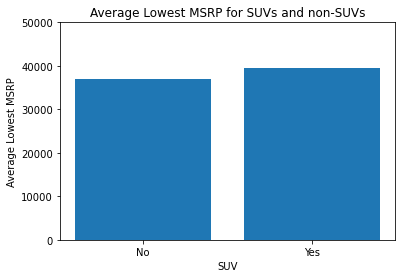

In [137]:
plt.bar(msrp["SUV"], msrp["Lowest MSRP"])
plt.ylim(0,50000)
plt.xlabel('SUV')
plt.ylabel("Average Lowest MSRP")
plt.title('Average Lowest MSRP for SUVs and non-SUVs')


---

### Question 15

A) Create a scatter plot of Overall MPG vs. Weight of the cars.  

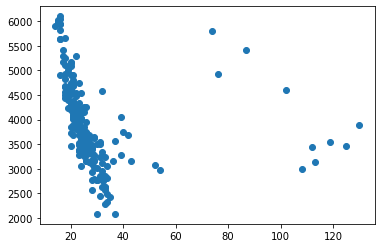

In [138]:
#Your code to answer the question goes here
plt.scatter(cars["Overall MPG"] , cars["Weight (lbs)"])

In [139]:
cor = cars.corr()
cor["Overall MPG"]

Seating                 -0.181477
HP                      -0.190034
Length (in)             -0.293361
Width (in)              -0.256826
Height (in)             -0.219772
Wheelbase (in)          -0.224607
Weight (lbs)            -0.229978
Cargo Volume (cu ft.)   -0.194918
Overall MPG              1.000000
Lowest MSRP             -0.042906
Name: Overall MPG, dtype: float64

B) Find the correlation coefficient and write a sentence interpreting it.

The correlation coefficent is is -.23. This means there is a slight negative relationship between Overall MPG and Weight

---

## ASK GOOD QUESTIONS

We can use groupby to  ask good questions.  

### Question 16

A) Ask a **mature** question about the car data set that can be answered via ``groupby`` and a bar chart.

What country the highest average MVP cars?

B) Draw the bar chart.

In [140]:
MPG = cars.groupby("Parent Company HQ").mean().reset_index()
MPG

,Parent Company HQ,Seating,HP,Length (in),Width (in),Height (in),Wheelbase (in),Weight (lbs),Cargo Volume (cu ft.),Overall MPG,Lowest MSRP
0,China,5.400000,237.400000,187.200000,78.000000,62.800000,113.200000,4071.000000,24.100000,23.200000,40870.000000
1,Germany,4.796296,260.074074,185.129630,73.629630,60.000000,110.462963,3972.388889,20.551852,28.796296,49606.666667
2,India,5.666667,266.444444,185.444444,80.333333,67.444444,112.111111,4663.333333,29.744444,26.000000,54987.777778
3,Italy,4.428571,240.142857,176.000000,72.428571,60.000000,106.142857,3655.714286,16.357143,24.571429,44278.571429
4,Japan,5.357143,224.914286,184.885714,72.771429,61.957143,108.042857,3633.157143,24.805714,28.228571,30626.642857
5,Korea,5.500000,207.550000,183.850000,73.150000,61.100000,109.050000,3545.350000,24.025000,31.975000,27761.000000
6,USA,5.666667,267.824561,190.982456,75.263158,64.280702,113.017544,4240.192982,30.733333,27.894737,36790.701754


Text(0, 0.5, 'Average MPG')

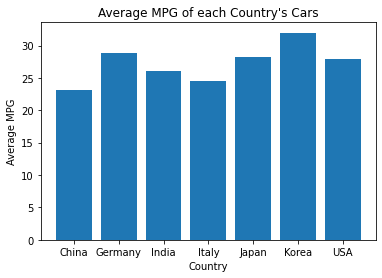

In [141]:
#Code here
#As always, Feel free to add more code cells!
plt.bar(MPG["Parent Company HQ"],MPG["Overall MPG"])
plt.title("Average MPG of each Country's Cars")
plt.xlabel('Country')
plt.ylabel('Average MPG')

C) What do you learn your question/analysis?

Korea makes the cars with the highest average MPG. 

---


## EMPLOYEE DATA

Now let's ask good questions about the employee dataset.  Recall that the company that generated the dataset was trying to understand employee satisfcation and retention.  

Import it by running the cell below.  Here 's an explanation of variables/headers:

* **employee_id**                  
* **satisfaction_level**:                       A score rating how satisfied the employee was with the company (scale 0-1)        
* **last_evaluation_score**:               A score from 0-1 rating the person's performance
* **number_of_projects**:                 Number of projects the person was assigned to        
* **average_monthly_hours**:          The average hours the person worked per month        
* **years_spent_at_company**:        
* **work_accident**:                           
    * 0: No accident   
    * 1: The person was in an accident
* **left_company**                              
    * 0: Did not leave company    
    * 1: Did leave company        
* **promotion_in_last_5years**       
    * 0: Not promoted over last 5 years   
    * 1: Was promoted
* **department**       
* **salary:**                                          high medium or low based on the groups in salary_range
* **salary_range:**                              
    * less than 45,000
    * 45000-74999 
    * 75000 or more

In [142]:
emp_data = pd.read_csv("employee_satisfaction.csv")
emp_data

,employee_id,satisfaction_level,last_evaluation_score,number_of_projects,average_monthly_hours,years_spent_at_company,work_accident,left_company,promotion_in_last_5years,department,salary,salary_range
0,1,0.38,0.53,2,157,3,0,1,0,sales,low,"Less than $45,000"
1,2,0.80,0.86,5,262,6,0,1,0,sales,medium,"$45,000 - $74,999"
2,3,0.11,0.88,7,272,4,0,1,0,sales,medium,"$45,000 - $74,999"
3,4,0.72,0.87,5,223,5,0,1,0,sales,low,"Less than $45,000"
4,5,0.37,0.52,2,159,3,0,1,0,sales,low,"Less than $45,000"
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,0.37,0.48,2,160,3,0,1,0,support,low,"Less than $45,000"
14996,14997,0.37,0.53,2,143,3,0,1,0,support,low,"Less than $45,000"
14997,14998,0.11,0.96,6,280,4,0,1,0,support,low,"Less than $45,000"
14998,14999,0.37,0.52,2,158,3,0,1,0,support,low,"Less than $45,000"



### Question 17?

A) Find the average salary per department using groupby.

In [143]:
emp_data.groupby("salary_range").mean()

,employee_id,satisfaction_level,last_evaluation_score,number_of_projects,average_monthly_hours,years_spent_at_company,work_accident,left_company,promotion_in_last_5years
salary_range,,,,,,,,,
"$45,000 - $74,999",7479.844400,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079
"Greater than $75,000",8622.897332,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
"Less than $45,000",7328.946153,0.600743,0.717015,3.799781,200.995763,3.438158,0.142135,0.296980,0.009020


B) Create an appropriate visualization to show the average salary per department from (A).


In [144]:
#Code here
#Feel free to add more code cells!

C)  Explain what we can learn from this visualization.

*Write your explanation summarizing what you've learned.*

---

### Question 18

A) Find the average satisfaction level per number of years at the company using groupby.

In [145]:
years = emp_data.groupby("years_spent_at_company").mean().reset_index()
years

,years_spent_at_company,employee_id,satisfaction_level,last_evaluation_score,number_of_projects,average_monthly_hours,work_accident,left_company,promotion_in_last_5years
0,2,7389.540999,0.697078,0.717596,3.687423,200.133169,0.172010,0.016338,0.016646
1,3,7382.897579,0.626299,0.668726,3.327747,186.634233,0.138889,0.246276,0.020795
2,4,7151.856081,0.467517,0.767927,4.627689,223.455221,0.124364,0.348064,0.013688
3,5,6752.874406,0.610305,0.813666,4.519348,222.978955,0.116090,0.565513,0.011541
4,6,7758.082173,0.603440,0.754875,4.213092,212.051532,0.149025,0.291086,0.023677
5,7,12762.180851,0.635957,0.682766,3.851064,200.744681,0.138298,0.000000,0.191489
6,8,12643.611111,0.665062,0.711975,3.777778,193.802469,0.271605,0.000000,0.061728
7,10,12655.602804,0.655327,0.731495,3.682243,199.224299,0.233645,0.000000,0.074766


B) Create an appropriate visualization to show how the average satisfcation level changes per year, using the result of (A).


Text(0, 0.5, 'Satisfaction Level')

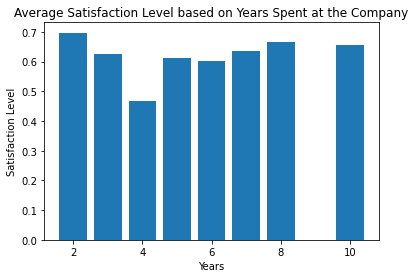

In [146]:
plt.bar(years["years_spent_at_company"], years["satisfaction_level"])
plt.title('Average Satisfaction Level based on Years Spent at the Company')
plt.xlabel('Years')
plt.ylabel('Satisfaction Level')

C)  Explain what we can learn from this visualization.

The satisfaction levels seem to be the highest with the people who have worked for the company for a short or long amount of time, and the lowest with the middle years.

---

You're done!  Submit!